In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2721760499982723742
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15685569792
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14323300764949948911
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [2]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

!pip install bs4 &>/dev/null
from bs4 import BeautifulSoup

In [3]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean_sentences(line):
    
    #removing contractions
    line=re.sub("br",'',line)
    line=re.sub("don't",'not',line)
    line=re.sub("does",'',line)
    line=re.sub("doesn't",'not',line)
    
    line=re.sub("has",'',line)
    line=re.sub("hasn't",'not',line)
    line=re.sub("haven't",'not',line)
    
    line=re.sub("was",'',line)
    line=re.sub("wasn't",'',line)
    line=re.sub("weren't",'',line)
    
    line=re.sub("you're",'',line)
    line=re.sub("we're",'',line)
    line=re.sub("they're",'',line)
    
    
    line=re.sub("you've",'',line)
    line=re.sub("they've",'',line)
    line=re.sub("we've",'',line)
    
    line=re.sub("shouldn't",'should not',line)
    line=re.sub("wouldn't",'would not',line)
    line=re.sub("couldn't",'could not',line)
   
   
    
    #special characters and emojis
    line=re.sub('\x91The','',line)
    line=re.sub('\x97','',line)
    line=re.sub('\x84The','',line)
    line=re.sub('\uf0b7','',line)
    line=re.sub('¡¨','',line)
    line=re.sub('\x95','',line)
    line=re.sub('\x8ei\x9eek','',line)
    line=re.sub('\xad','',line)
    line=re.sub('\x84bubble','bubble',line)
    
    # remove concated words
    line=re.sub('trivialBoring','trivial Boring',line)
    line=re.sub('Justforkix','Just for kix',line)
    line=re.sub('Nightbeast','Night beast',line)
    line=re.sub('DEATHTRAP','Death Trap',line)
    line=re.sub('CitizenX','Citizen X',line)
    line=re.sub('10Rated','10 Rated',line)
    line=re.sub('_The','_ The',line)
    line=re.sub('1Sound','1 Sound',line)
    line=re.sub('blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah','blah blah',line)
    line=re.sub('ResidentHazard','Resident Hazard',line)
    line=re.sub('iameracing','i am racing',line)
    line=re.sub('BLACKSNAKE','Black Snake',line)
    line=re.sub('DEATHSTALKER','Death Stalker',line)
    line=re.sub('_is_','is',line)
    line=re.sub('10Fans','10 Fans',line)
    line=re.sub('Yellowcoat','Yellow coat',line)
    line=re.sub('Spiderbabe','Spider babe',line)
    line=re.sub('Frightworld','Fright world',line)
    
    return line

In [5]:
def preprocess(s):

    s = BeautifulSoup(s, 'lxml').get_text()
    
    s = clean_sentences(s)
    
    s = re.sub("[^a-zA-Z]"," ", s).lower().strip()
    
    s = [lemmatizer.lemmatize(word) for word in s.split()]
    
    s = [lemmatizer.lemmatize(word, "v") for word in s]
    
    s = [word for word in s if word not in stop_words]
    
    s = " ".join(s)
    
    return s

In [6]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data()

imdb_x = np.concatenate((x_train, x_test))
imdb_y = np.concatenate((y_train, y_test))
len(imdb_x)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

50000

In [7]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0                                                    # Padding
word_dict[''] = 1                                                   # Start
word_dict['?'] = 2                                                   # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }

1646592/1641221 [==============================] - 0s 0us/step


In [28]:
imdb_df = pd.DataFrame()
imdb_df['x_num'] = imdb_x
imdb_df['sentiment'] = imdb_y
imdb_df.head()

,x_num,sentiment
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0


In [29]:
imdb_df['x'] = imdb_df['x_num'].apply(lambda x: preprocess(' '.join(reverse_word_dict[id] for id in x)))

imdb_df.head()

,x_num,sentiment,x
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1,film illiant cast location scenery story direc...
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0,big hair big boob bad music giant safety pin w...
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0,one worst film friend watch film target audien...
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...",1,scot excel storytelling traditional sort many ...
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0,worst mistake life pick movie target figure he...


In [10]:
review_df = pd.read_csv('../input/cse4302/cse4302_train.tsv', sep='\t')

processed_df = pd.DataFrame()

processed_df['p_review'] = review_df.review.apply(lambda x: preprocess(x))
processed_df['p_sentiment'] = review_df.sentiment.map({'positive': 1, 'negative': 0})


review_df_test = pd.read_csv('../input/cse4302/cse4302_test.tsv', sep='\t')

processed_df_test = pd.DataFrame()
processed_df_test['review_test'] = review_df_test.review.apply(lambda x: preprocess(x))

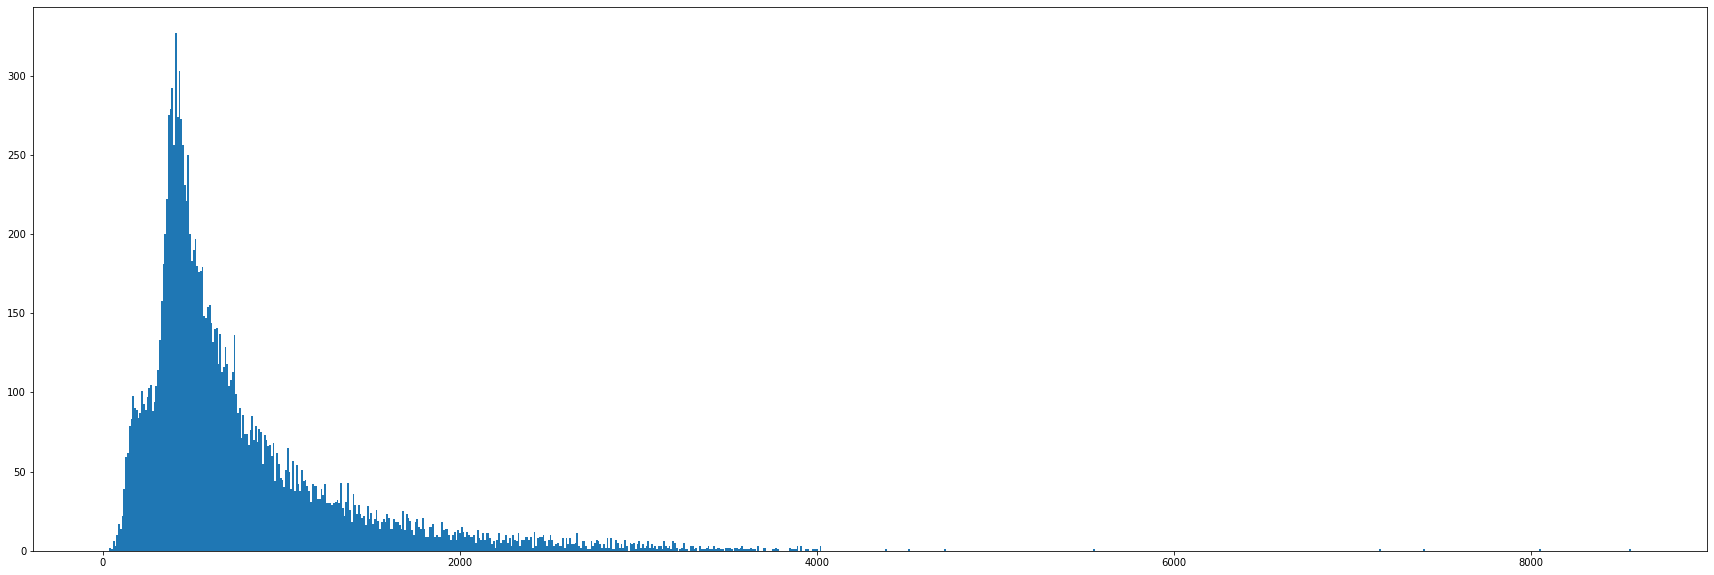

In [11]:
length_df = pd.DataFrame()
length_df['review_list'] = np.array(list(map(len, processed_df['p_review'])))

plt.figure(figsize=(30, 10))
plt.hist(length_df['review_list'], bins=((length_df['review_list'].max() + 10) // 10))
print()

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

num_words = 40000
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(processed_df['p_review'])
tokenized_train = tokenizer.texts_to_sequences(processed_df['p_review'])



print(len(tokenizer.index_word))

maxlen = 2000
x = pad_sequences(tokenized_train, maxlen=maxlen) # , truncating='post', padding='post')
y = processed_df['p_sentiment']


tokenized_test = tokenizer.texts_to_sequences(processed_df_test['review_test'])

pad_test = pad_sequences(tokenized_test, maxlen=maxlen) # , truncating='post', padding='post')


tokenized_imdb = tokenizer.texts_to_sequences(imdb_df['x'])

pad_imdb = pad_sequences(tokenized_imdb, maxlen=maxlen) # , truncating='post', padding='post')

48660


In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Conv1D, LSTM, Bidirectional, Dropout, Dense


model= keras.Sequential()
model.add(Embedding(num_words, 256, input_length=maxlen))
model.add(Conv1D(256, 10, activation='elu'))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2000, 256)         10240000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1991, 256)         655616    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1991, 256)         394240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1991, 256)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(pad_imdb, imdb_df['sentiment'], test_size=0.25, random_state=33)

print(X_train.shape, Y_train.shape)

rms = keras.optimizers.RMSprop(lr=0.0005)

model.compile(loss='binary_crossentropy',
              optimizer=rms,
              metrics=['accuracy']
             )


checkpoints = ModelCheckpoint(filepath='/kaggle/working/checkpoints',
                            monitor="val_accuracy",
                            verbose=1,
                            save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val), epochs=3, batch_size=100)

evaluation = model.evaluate(x, y, batch_size=100)

(37500, 2000) (37500,)
Epoch 1/3
375/375 [==============================] - 248s 643ms/step - loss: 0.4268 - accuracy: 0.7996 - val_loss: 0.2719 - val_accuracy: 0.8920
Epoch 2/3
375/375 [==============================] - 241s 642ms/step - loss: 0.2106 - accuracy: 0.9235 - val_loss: 0.2768 - val_accuracy: 0.8968
Epoch 3/3
150/150 [==============================] - 31s 207ms/step - loss: 0.1287 - accuracy: 0.9575


In [33]:
pred = model.predict(pad_test)

In [36]:
ans = pd.DataFrame()

id_ = [x for x in range(1, 35001)]

ans['id'] = id_

ans['category'] = (pred > 0.5).astype('int')

ans.to_csv('ans.csv', index=False)

In [38]:
ans.head()

,id,category
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
